<a href="https://colab.research.google.com/github/jonasfover/2-Semester-/blob/master/football_champion_league.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Exploration

In [67]:

import json
from pandas.io.json import json_normalize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
with open('/content/drive/MyDrive/2 semester/data_merge.json') as json_data:
    data = json.load(json_data)

In [69]:
df = pd.json_normalize(data, max_level=3)


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17361 entries, 0 to 17360
Columns: 119 entries, id to block.save_block
dtypes: float64(33), int64(9), object(77)
memory usage: 15.8+ MB


In [71]:
df.describe()

,index,period,minute,second,possession,duration,type.id,possession_team.id,play_pattern.id,team.id,tactics.formation,player.id,position.id,pass.recipient.id,pass.length,pass.angle,pass.height.id,pass.type.id,pass.body_part.id,pass.outcome.id,ball_receipt.outcome.id,duel.type.id,dribble.outcome.id,duel.outcome.id,shot.statsbomb_xg,shot.type.id,shot.outcome.id,shot.technique.id,shot.body_part.id,goalkeeper.position.id,goalkeeper.type.id,interception.outcome.id,goalkeeper.technique.id,50_50.outcome.id,goalkeeper.outcome.id,foul_committed.type.id,goalkeeper.body_part.id,substitution.outcome.id,substitution.replacement.id,bad_behaviour.card.id,foul_committed.card.id,pass.technique.id
count,17361.000000,17361.000000,17361.000000,17361.000000,17361.000000,10682.000000,17361.000000,17361.000000,17361.000000,17361.000000,25.000000,17090.000000,17090.000000,4427.000000,4706.000000,4706.000000,4706.000000,823.000000,4475.000000,925.000000,646.0,239.000000,136.000000,147.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,175.000000,85.000000,49.000000,10.000000,76.000000,6.000000,34.000000,29.000000,29.000000,5.0,9.000000,10.0
mean,1740.209262,1.498934,45.347503,29.368182,94.572951,1.628528,32.153793,779.885490,2.455331,780.528599,1726.480000,5248.072206,11.453189,5206.776372,22.097505,0.023536,1.525287,65.182260,39.808939,20.004324,9.0,10.615063,8.411765,12.482993,0.111095,86.680000,98.093333,93.026667,39.293333,43.846667,30.971429,10.435294,45.571429,2.200000,41.144737,23.500000,36.441176,102.896552,5756.413793,7.0,6.888889,108.0
std,1008.584549,0.500013,27.353172,17.330922,57.333007,8.580951,12.067856,7.585186,2.129581,7.854517,1815.284829,2014.428004,7.178851,1962.210860,14.820781,1.551357,0.829515,1.871369,3.967673,24.735090,0.0,0.487602,0.493972,4.630681,0.165563,2.880902,1.619291,0.866581,3.774778,0.501497,2.533519,5.375090,0.500000,1.398412,18.623071,1.224745,2.500802,0.309934,3077.827661,0.0,0.333333,0.0
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000,770.000000,1.000000,770.000000,343.000000,2954.000000,1.000000,2954.000000,0.000000,-3.099950,1.000000,61.000000,37.000000,9.000000,9.0,10.000000,8.000000,4.000000,0.007396,62.000000,96.000000,90.000000,37.000000,42.000000,25.000000,4.000000,45.000000,1.000000,15.000000,21.000000,35.000000,102.000000,2954.000000,7.0,6.000000,108.0
25%,869.000000,1.000000,22.000000,14.000000,44.000000,0.787000,30.000000,773.000000,1.000000,773.000000,433.000000,3944.000000,5.000000,3831.000000,12.010399,-1.190290,1.000000,64.000000,38.000000,9.000000,9.0,10.000000,8.000000,13.000000,0.023619,87.000000,97.000000,93.000000,38.000000,44.000000,32.000000,4.000000,45.000000,1.000000,15.000000,24.000000,35.000000,103.000000,4826.000000,7.0,7.000000,108.0
50%,1737.000000,1.000000,45.000000,29.000000,96.000000,1.253000,30.000000,781.000000,1.000000,781.000000,442.000000,5549.000000,12.000000,5547.000000,18.439089,0.000000,1.000000,66.000000,40.000000,9.000000,9.0,11.000000,8.000000,14.000000,0.043956,87.000000,98.000000,93.000000,40.000000,44.000000,32.000000,13.000000,46.000000,1.500000,53.000000,24.000000,35.000000,103.000000,5587.000000,7.0,7.000000,108.0
75%,2605.000000,2.000000,68.000000,44.000000,141.000000,1.933000,42.000000,786.000000,4.000000,786.000000,4231.000000,5601.000000,17.000000,5596.000000,28.160255,1.230571,2.000000,66.000000,40.000000,9.000000,9.0,11.000000,9.000000,16.000000,0.105720,87.000000,100.000000,93.000000,40.000000,44.000000,32.000000,16.000000,46.000000,3.750000,55.000000,24.000000,37.250000,103.000000,5834.000000,7.0,7.000000,108.0
max,3720.000000,2.000000,98.000000,59.000000,220.000000,878.440000,43.000000,795.000000,9.000000,795.000000,4411.000000,20005.000000,25.000000,20005.000000,102.859120,3.141593,3.000000,67.000000,70.000000,77.000000,9.0,11.000000,9.000000,16.000000,0.842828,88.000000,101.000000,95.000000,70.000000,44.000000,34.000000,16.000000,46.000000,4.000000,59.000000,24.000000,41.000000,103.000000,19988.000000,7.0,7.00000

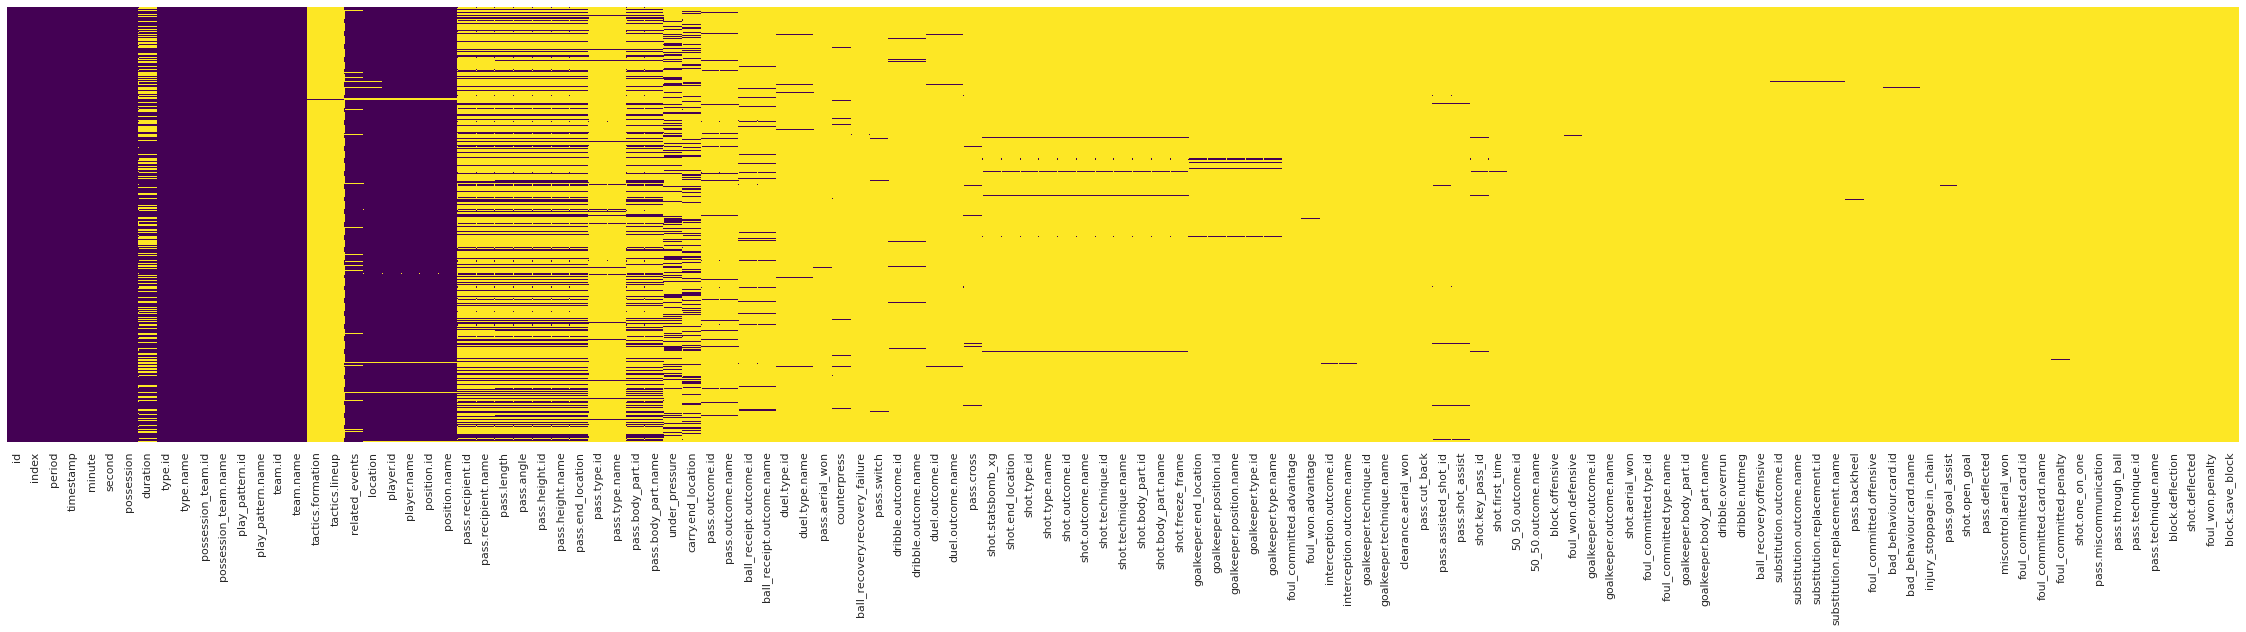

In [72]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [73]:
print(df.columns
)

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession',
       'duration', 'type.id', 'type.name',
       ...
       'foul_committed.penalty', 'shot.one_on_one', 'pass.miscommunication',
       'pass.through_ball', 'pass.technique.id', 'pass.technique.name',
       'block.deflection', 'shot.deflected', 'foul_won.penalty',
       'block.save_block'],
      dtype='object', length=119)


In [74]:
df.head(10)

,id,index,period,timestamp,minute,second,possession,duration,type.id,type.name,possession_team.id,possession_team.name,play_pattern.id,play_pattern.name,team.id,team.name,tactics.formation,tactics.lineup,related_events,location,player.id,player.name,position.id,position.name,pass.recipient.id,pass.recipient.name,pass.length,pass.angle,pass.height.id,pass.height.name,pass.end_location,pass.type.id,pass.type.name,pass.body_part.id,pass.body_part.name,under_pressure,carry.end_location,pass.outcome.id,pass.outcome.name,ball_receipt.outcome.id,...,shot.first_time,50_50.outcome.id,50_50.outcome.name,block.offensive,foul_won.defensive,goalkeeper.outcome.id,goalkeeper.outcome.name,shot.aerial_won,foul_committed.type.id,foul_committed.type.name,goalkeeper.body_part.id,goalkeeper.body_part.name,dribble.overrun,dribble.nutmeg,ball_recovery.offensive,substitution.outcome.id,substitution.outcome.name,substitution.replacement.id,substitution.replacement.name,pass.backheel,foul_committed.offensive,bad_behaviour.card.id,bad_behaviour.card.name,injury_stoppage.in_chain,pass.goal_assist,shot.open_goal,pass.deflected,miscontrol.aerial_won,foul_committed.card.id,foul_committed.card.name,foul_committed.penalty,shot.one_on_one,pass.miscommunication,pass.through_ball,pass.technique.id,pass.technique.name,block.deflection,shot.deflected,foul_won.penalty,block.save_block
0,68add300-4d97-42e4-bd31-437fc946379a,1,1,00:00:00.000,0,0,1,0.000,35,Starting XI,781,Brazil,1,Regular Play,781,Brazil,433.0,"[{'player': {'id': 5547, 'name': 'Alisson Rams...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,a7e47efe-8e4c-4594-b97a-33bcd3df74de,2,1,00:00:00.000,0,0,1,38.786,35,Starting XI,781,Brazil,1,Regular Play,795,Costa Rica,343.0,"[{'player': {'id': 5597, 'name': 'Keylor Navas...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,793be941-4c64-4b5a-b632-ae617171f839,3,1,00:00:00.000,0,0,1,NaN,18,Half Start,781,Brazil,1,Regular Play,781,Brazil,NaN,NaN,[beac7e80-9c47-429e-8900-23ad07a9a6f1],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,beac7e80-9c47-429e-8900-23ad07a9a6f1,4,1,00:00:00.000,0,0,1,NaN,18,Half Start,781,Brazil,1,Regular Play,795,Costa Rica,NaN,NaN,[793be941-4c64-4b5a-b632-ae617171f839],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,acbef1b4-497b-4106-baf9-b005e20dd3da,5,1,00:00:01.080,0,1,2,2.760,30,Pass,795,Costa Rica,9,From Kick Off,795,Costa Rica,NaN,NaN,[65349833-cfe2-4966-bfc0-ff12fc6de814],"[61, 40]",5586.0,Marcos Danilo Ureña Porras,23.0,Center Forward,5597.0,Keylor Navas Gamboa,40.00000,3.141593,1.0,Ground Pass,"[21, 40]",65.0,Kick Off,40.0,Right Foot,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,65349833-cfe2-4966-bfc0-ff12fc6de814,6,1,00:00:03.840,0,3,2,NaN,42,Ball Receipt*,795,Costa Rica,9,From Kick Off,795,Costa Rica,NaN,NaN,[acbef1b4-497b-4106-baf9-b005e20dd3da],"[21, 40]",5597.0,Keylor Navas Gamboa,1.0,Goalkeeper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

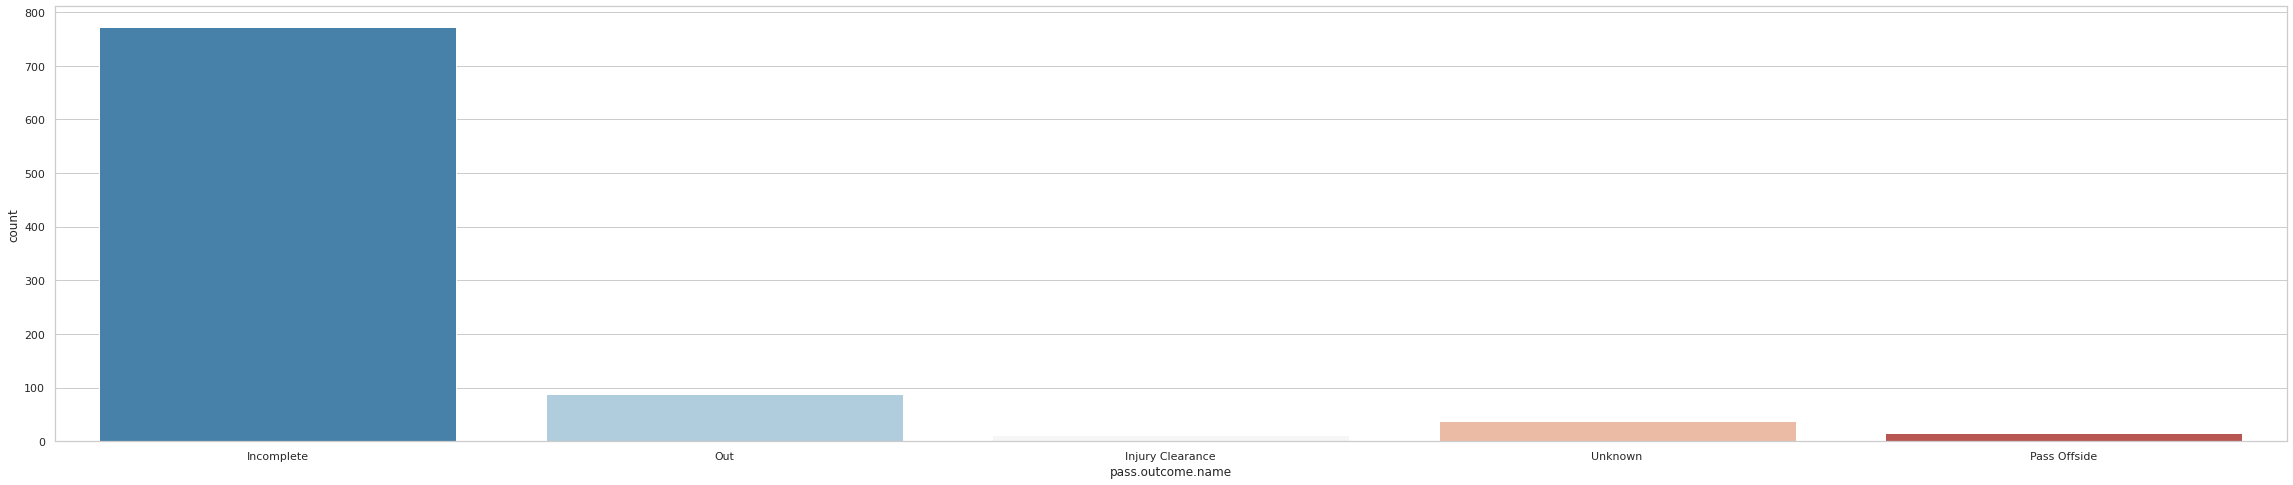

In [75]:
sns.set_style('whitegrid')
sns.countplot(x='pass.outcome.name',data=df,palette='RdBu_r')

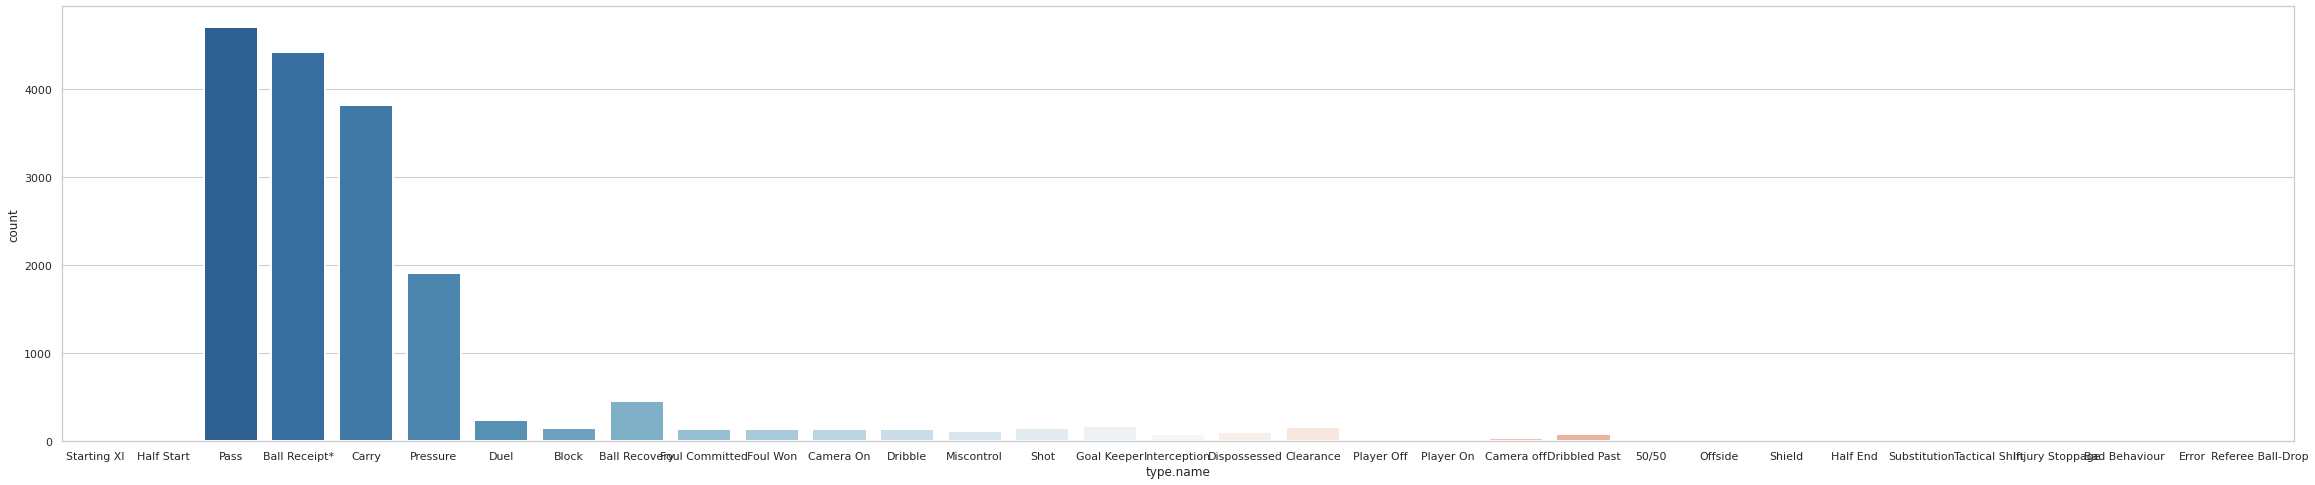

In [76]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 40,8
sns.set_style('whitegrid')
sns.countplot(x='type.name'	,data=df,palette='RdBu_r',linewidth = 2)

In [77]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

In [82]:
outcome = df['pass.outcome.name']


In [83]:
outcome.value_counts(ascending=True)


Injury Clearance     11
Pass Offside         16
Unknown              38
Out                  88
Incomplete          772
Name: pass.outcome.name, dtype: int64

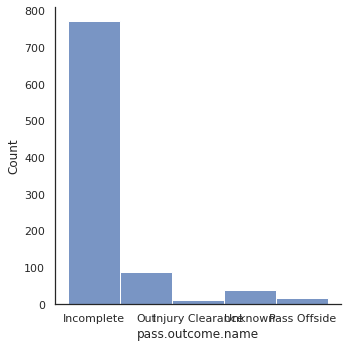

In [84]:
sns.displot(outcome)

In [85]:
df.columns


Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession',
       'duration', 'type.id', 'type.name',
       ...
       'foul_committed.penalty', 'shot.one_on_one', 'pass.miscommunication',
       'pass.through_ball', 'pass.technique.id', 'pass.technique.name',
       'block.deflection', 'shot.deflected', 'foul_won.penalty',
       'block.save_block'],
      dtype='object', length=119)

In [86]:
df.head(15)

,id,index,period,timestamp,minute,second,possession,duration,type.id,type.name,possession_team.id,possession_team.name,play_pattern.id,play_pattern.name,team.id,team.name,tactics.formation,tactics.lineup,related_events,location,player.id,player.name,position.id,position.name,pass.recipient.id,pass.recipient.name,pass.length,pass.angle,pass.height.id,pass.height.name,pass.end_location,pass.type.id,pass.type.name,pass.body_part.id,pass.body_part.name,under_pressure,carry.end_location,pass.outcome.id,pass.outcome.name,ball_receipt.outcome.id,...,shot.first_time,50_50.outcome.id,50_50.outcome.name,block.offensive,foul_won.defensive,goalkeeper.outcome.id,goalkeeper.outcome.name,shot.aerial_won,foul_committed.type.id,foul_committed.type.name,goalkeeper.body_part.id,goalkeeper.body_part.name,dribble.overrun,dribble.nutmeg,ball_recovery.offensive,substitution.outcome.id,substitution.outcome.name,substitution.replacement.id,substitution.replacement.name,pass.backheel,foul_committed.offensive,bad_behaviour.card.id,bad_behaviour.card.name,injury_stoppage.in_chain,pass.goal_assist,shot.open_goal,pass.deflected,miscontrol.aerial_won,foul_committed.card.id,foul_committed.card.name,foul_committed.penalty,shot.one_on_one,pass.miscommunication,pass.through_ball,pass.technique.id,pass.technique.name,block.deflection,shot.deflected,foul_won.penalty,block.save_block
0,68add300-4d97-42e4-bd31-437fc946379a,1,1,00:00:00.000,0,0,1,0.000,35,Starting XI,781,Brazil,1,Regular Play,781,Brazil,433.0,"[{'player': {'id': 5547, 'name': 'Alisson Rams...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,a7e47efe-8e4c-4594-b97a-33bcd3df74de,2,1,00:00:00.000,0,0,1,38.786,35,Starting XI,781,Brazil,1,Regular Play,795,Costa Rica,343.0,"[{'player': {'id': 5597, 'name': 'Keylor Navas...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,793be941-4c64-4b5a-b632-ae617171f839,3,1,00:00:00.000,0,0,1,NaN,18,Half Start,781,Brazil,1,Regular Play,781,Brazil,NaN,NaN,[beac7e80-9c47-429e-8900-23ad07a9a6f1],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,beac7e80-9c47-429e-8900-23ad07a9a6f1,4,1,00:00:00.000,0,0,1,NaN,18,Half Start,781,Brazil,1,Regular Play,795,Costa Rica,NaN,NaN,[793be941-4c64-4b5a-b632-ae617171f839],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,acbef1b4-497b-4106-baf9-b005e20dd3da,5,1,00:00:01.080,0,1,2,2.760,30,Pass,795,Costa Rica,9,From Kick Off,795,Costa Rica,NaN,NaN,[65349833-cfe2-4966-bfc0-ff12fc6de814],"[61, 40]",5586.0,Marcos Danilo Ureña Porras,23.0,Center Forward,5597.0,Keylor Navas Gamboa,40.000000,3.141593,1.0,Ground Pass,"[21, 40]",65.0,Kick Off,40.0,Right Foot,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,65349833-cfe2-4966-bfc0-ff12fc6de814,6,1,00:00:03.840,0,3,2,NaN,42,Ball Receipt*,795,Costa Rica,9,From Kick Off,795,Costa Rica,NaN,NaN,[acbef1b4-497b-4106-baf9-b005e20dd3da],"[21, 40]",5597.0,Keylor Navas Gamboa,1.0,Goalkeeper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## Data Processing

In [89]:
data_subset = df[['pass.outcome.name','type.id','type.name','pass.length','pass.angle','location','pass.end_location','pass.height.id','pass.type.name','pass.body_part.name','under_pressure']]

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
data_subset.head()

,pass.outcome.name,type.id,type.name,pass.length,pass.angle,location,pass.end_location,pass.height.id,pass.type.name,pass.body_part.name,under_pressure
0,NaN,35,Starting XI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,35,Starting XI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,18,Half Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,18,Half Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,30,Pass,40.0,3.141593,"[61, 40]","[21, 40]",1.0,Kick Off,Right Foot,NaN


In [90]:
df['pass.outcome.name'].value_counts(ascending=True)


Injury Clearance     11
Pass Offside         16
Unknown              38
Out                  88
Incomplete          772
Name: pass.outcome.name, dtype: int64

In [92]:
# Keeps only rows without a missing value
df1 = data_subset[data_subset['type.name'].str.startswith('Pass', na=False)]


In [ ]:
df1.head()

,pass.outcome.name,type.id,type.name,pass.length,pass.angle,location,pass.end_location,pass.height.id,pass.type.name,pass.body_part.name,under_pressure
4,NaN,30,Pass,40.000000,3.141593,"[61, 40]","[21, 40]",1.0,Kick Off,Right Foot,NaN
8,Incomplete,30,Pass,66.708320,0.226799,"[24, 46]","[89, 61]",3.0,NaN,Right Foot,True
11,Incomplete,30,Pass,1.000000,0.000000,"[34, 22]","[35, 22]",3.0,Recovery,NaN,True
13,NaN,30,Pass,19.849434,0.714091,"[36, 27]","[51, 40]",3.0,Recovery,Right Foot,NaN
15,Incomplete,30,Pass,5.000000,0.643501,"[56, 43]","[60, 46]",2.0,NaN,NaN,True


In [94]:
df1['pass.outcome.name'].value_counts()

Incomplete          772
Out                  88
Unknown              38
Pass Offside         16
Injury Clearance     11
Name: pass.outcome.name, dtype: int64

In [95]:
df1['pass.outcome.name'] = df['pass.outcome.name'].replace(np.nan, 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [96]:
df1.head()

,pass.outcome.name,type.id,type.name,pass.length,pass.angle,location,pass.end_location,pass.height.id,pass.type.name,pass.body_part.name,under_pressure
4,1,30,Pass,40.000000,3.141593,"[61, 40]","[21, 40]",1.0,Kick Off,Right Foot,NaN
8,Incomplete,30,Pass,66.708320,0.226799,"[24, 46]","[89, 61]",3.0,NaN,Right Foot,True
11,Incomplete,30,Pass,1.000000,0.000000,"[34, 22]","[35, 22]",3.0,Recovery,NaN,True
13,1,30,Pass,19.849434,0.714091,"[36, 27]","[51, 40]",3.0,Recovery,Right Foot,NaN
15,Incomplete,30,Pass,5.000000,0.643501,"[56, 43]","[60, 46]",2.0,NaN,NaN,True


In [97]:
df2 = df1.replace('Incomplete',0)

In [98]:
df2.head()

,pass.outcome.name,type.id,type.name,pass.length,pass.angle,location,pass.end_location,pass.height.id,pass.type.name,pass.body_part.name,under_pressure
4,1,30,Pass,40.000000,3.141593,"[61, 40]","[21, 40]",1.0,Kick Off,Right Foot,NaN
8,0,30,Pass,66.708320,0.226799,"[24, 46]","[89, 61]",3.0,NaN,Right Foot,True
11,0,30,Pass,1.000000,0.000000,"[34, 22]","[35, 22]",3.0,Recovery,NaN,True
13,1,30,Pass,19.849434,0.714091,"[36, 27]","[51, 40]",3.0,Recovery,Right Foot,NaN
15,0,30,Pass,5.000000,0.643501,"[56, 43]","[60, 46]",2.0,NaN,NaN,True


In [99]:
df3 = df2[~df2['pass.outcome.name'].isin(['Out','Injury Clearance','Pass Offside','Unknown'])]

In [100]:
df3['pass.outcome.name'].value_counts(ascending=True)

0     772
1    3781
Name: pass.outcome.name, dtype: int64

In [ ]:
df3

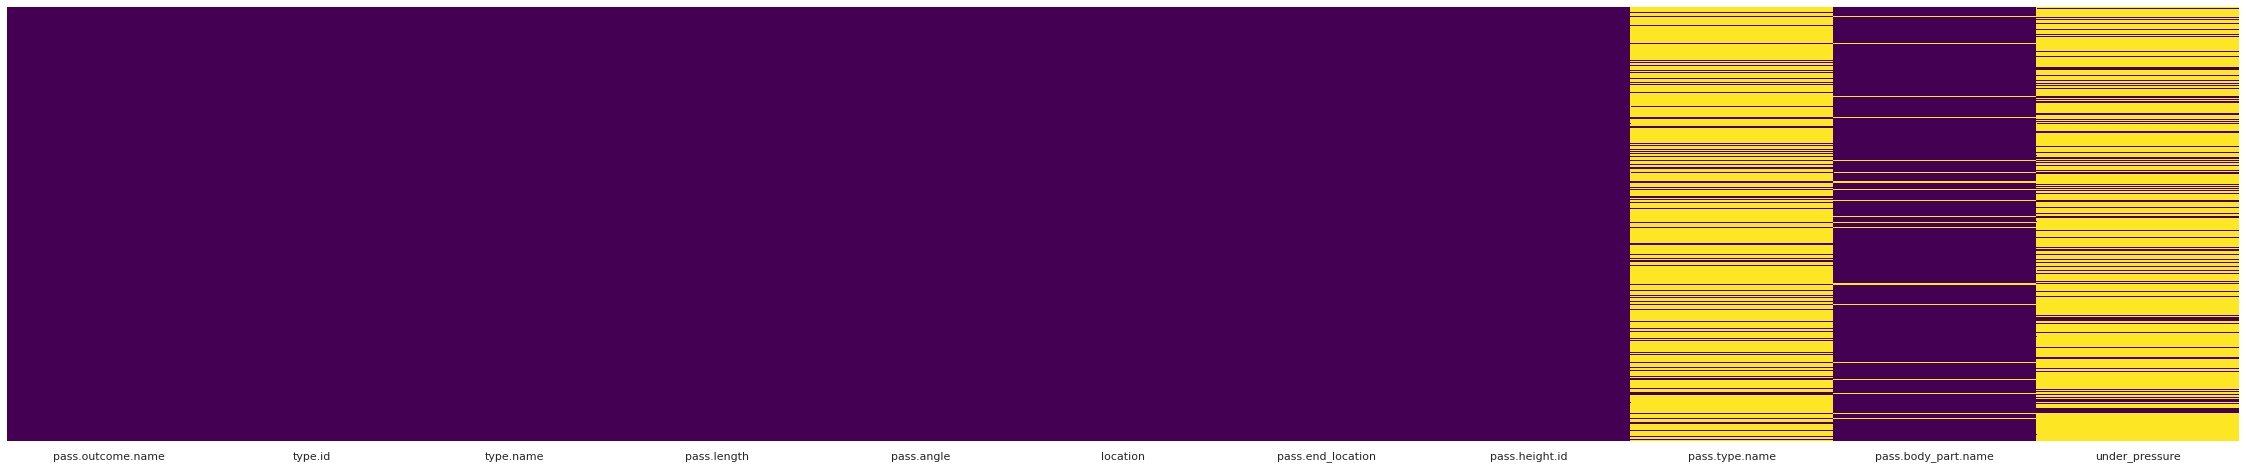

In [102]:
sns.heatmap(df3.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [107]:
df3.columns

Index(['pass.outcome.name', 'type.id', 'type.name', 'pass.length',
       'pass.angle', 'location', 'pass.end_location', 'pass.height.id',
       'pass.body_part.name', 'under_pressure'],
      dtype='object')

In [108]:
# df3.drop('pass.type.name',axis=1,inplace=True) #,'pass.body_part.name','under_pressure'
df3.drop('pass.body_part.name',axis=1,inplace=True)
df3.drop('under_pressure',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [111]:
df3.drop('type.name',axis=1,inplace=True)
df3.drop('type.id',axis=1,inplace=True)
df3.drop('location',axis=1,inplace=True)
df3.drop('pass.end_location',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


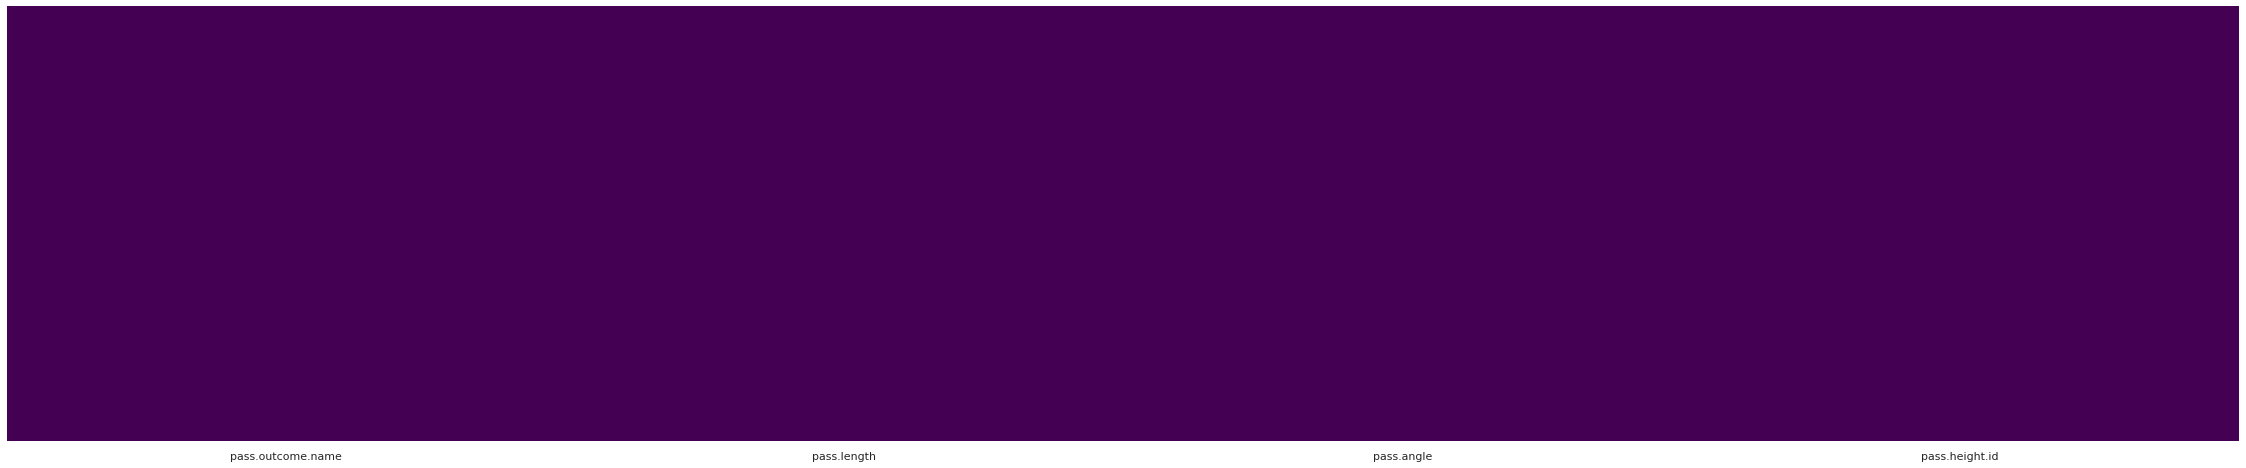

In [112]:
sns.heatmap(df3.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [113]:
df3.head()

,pass.outcome.name,pass.length,pass.angle,pass.height.id
4,1,40.000000,3.141593,1.0
8,0,66.708320,0.226799,3.0
11,0,1.000000,0.000000,3.0
13,1,19.849434,0.714091,3.0
15,0,5.000000,0.643501,2.0


In [114]:
from sklearn.model_selection import train_test_split

In [116]:
X_train, X_test, y_train, y_test = train_test_split(df3.drop('pass.outcome.name',axis=1), 
                                                    df3['pass.outcome.name'], test_size=0.30, 
                                                    random_state=101)

In [118]:
y_train.value_counts(ascending=True)




0     523
1    2664
Name: pass.outcome.name, dtype: int64

In [119]:
y_test.value_counts(ascending=True)

0     249
1    1117
Name: pass.outcome.name, dtype: int64

In [121]:
1117 / (1117 + 2664)

0.29542449087542977

## Logistic Regression

In [122]:
from sklearn.linear_model import LogisticRegression

In [124]:
logmodel = LogisticRegression()


In [144]:
y_test = y_test.to_frame()


In [145]:
type(y_test)

pandas.core.frame.DataFrame

In [147]:
y_train = y_train.to_frame()


In [148]:
type(y_train)

pandas.core.frame.DataFrame

In [150]:
X_train.shape

(3187, 3)

In [152]:
y_train.shape

(3187, 1)

In [153]:
X_train=X_train.astype('int')
y_train=y_train.astype('int')

In [158]:
X_test=X_test.astype('int')
y_test=y_test.astype('int')

In [161]:
X_train

,pass.length,pass.angle,pass.height.id
12663,7,0,1
3015,10,0,1
12065,21,0,1
17016,12,2,1
3610,15,0,1
...,...,...,...
15562,18,-1,1
15894,16,0,1
2109,19,0,1
5046,72,0,3


In [157]:
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [162]:
predictions = logmodel.predict(X_test)

In [169]:
from sklearn.metrics import classification_report, confusion_matrix,r2_score

In [174]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.02      0.03       249
           1       0.82      1.00      0.90      1117

    accuracy                           0.82      1366
   macro avg       0.91      0.51      0.47      1366
weighted avg       0.85      0.82      0.74      1366



In [168]:
print(confusion_matrix(y_test,predictions))

[[   4  245]
 [   0 1117]]


In [175]:
(4+1117) /(245+4+1117)

0.8206442166910688

In [ ]:
1117 - (1117-0)

In [170]:
print(r2_score(y_test,predictions))

-0.2032732541625768


In [172]:
r2_score(y_test, predictions, multioutput='variance_weighted')

-0.2032732541625768

Lav Det om til excel filer


In [173]:
X_train.to_excel("X_train.xlsx")  
X_test.to_excel("X_test.xlsx")  
y_train.to_excel("y_train.xlsx")  
y_test.to_excel("y_test.xlsx")


## Decision Tree 

In [209]:
from sklearn.tree import DecisionTreeClassifier

In [210]:
dtree = DecisionTreeClassifier()

In [211]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [212]:
predictions_tree = dtree.predict(X_test)

In [213]:
print(classification_report(y_test,predictions_tree))

              precision    recall  f1-score   support

           0       0.53      0.42      0.47       249
           1       0.88      0.92      0.90      1117

    accuracy                           0.83      1366
   macro avg       0.70      0.67      0.68      1366
weighted avg       0.81      0.83      0.82      1366



## Random Forests

In [214]:
from sklearn.ensemble import RandomForestClassifier


In [215]:
rfc = RandomForestClassifier(n_estimators=80)
rfc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(n_estimators=80)

In [216]:
rfc_pred = rfc.predict(X_test)

In [217]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.54      0.37      0.44       249
           1       0.87      0.93      0.90      1117

    accuracy                           0.83      1366
   macro avg       0.70      0.65      0.67      1366
weighted avg       0.81      0.83      0.81      1366



In [218]:
print(confusion_matrix(y_test,rfc_pred))

[[  91  158]
 [  78 1039]]
